# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

In [1]:
# Importando Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando o Dataframe

renda_raw = pd.read_csv('previsao_de_renda.csv')
renda_raw.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [5]:
# Vamos analizar as seguintes variáveis: qtd_filhos, idade, tempo_emprego, qt_pessoas_residencia e renda.

renda_raw[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']].corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


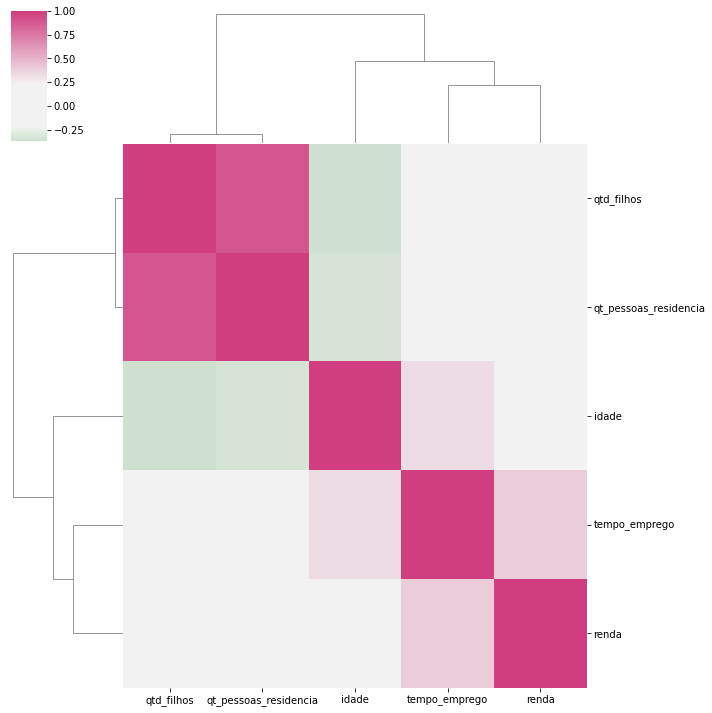

In [8]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(renda_raw[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']].corr(), figsize=(10, 10), center = 0, cmap=cmap)

**Análise Item 1**: Temos uma forte correlação entre qtd_filhos e qt_pessoas_residencia. Em questão a renda a variável tempo_emprego é a que mais se correlaciona entre todas, a segunda mais próxima seria idade, mas o corr acaba sendo muito baixo.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

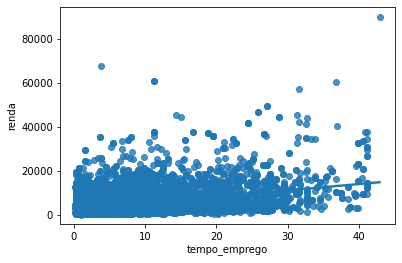

In [9]:
# As duas variáveis mais correlacionadas com renda são: tempo_emprego e idade

_ = sns.regplot(x='tempo_emprego', y='renda', data = renda_raw)

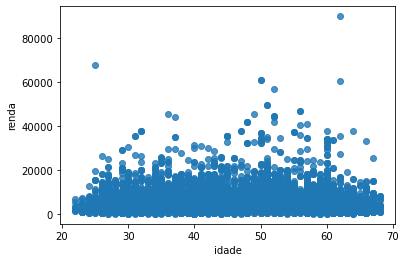

In [10]:
_ = sns.regplot(x='idade', y='renda', data = renda_raw)

**Análise Item 2**: Sinceramente não tem muito o que avaliar, temos diversos valores de renda tanto para diversos tempo_emprego quanto idade. Não existe uma tendência ou correlação forte entre os dados.

3) Na sua opinião, há outliers na variável renda?

Sim, nos 2 gráficos plotados no Item 2 observamos alguns dados de renda bem acima do aglomerado geral.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [11]:
renda_raw['log_renda'] = np.log(renda_raw['renda'])

In [12]:
renda_raw[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'log_renda']].corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.036267
log_renda,0.023743,0.024712,0.379556,0.036267,1.000000


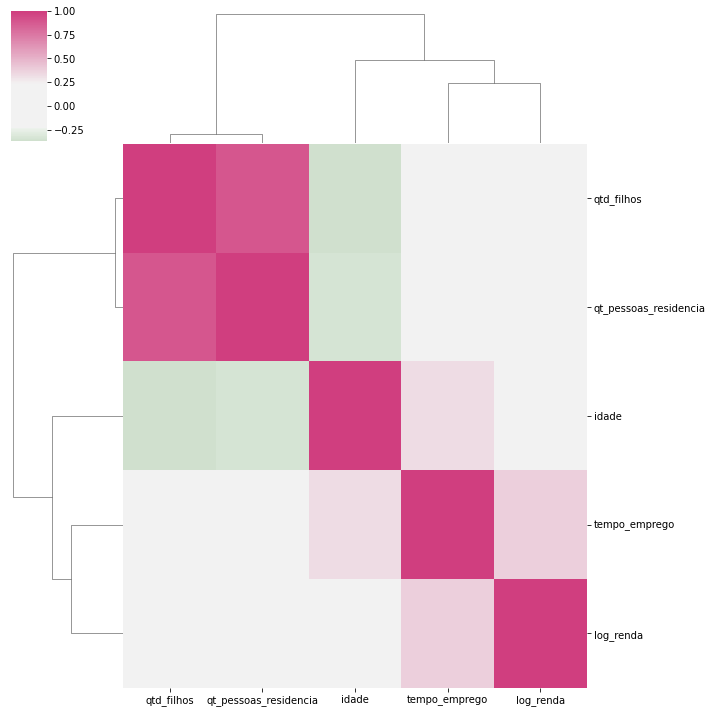

In [13]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(renda_raw[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'log_renda']].corr(), figsize=(10, 10), center = 0, cmap=cmap)

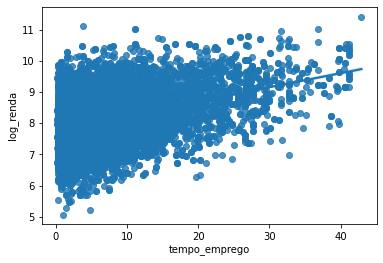

In [14]:
_ = sns.regplot(x='tempo_emprego', y='log_renda', data = renda_raw)

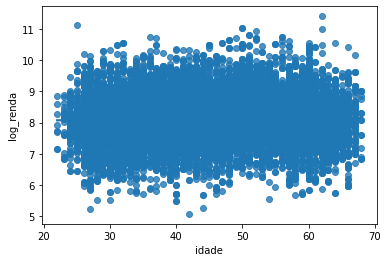

In [15]:
_ = sns.regplot(x='idade', y='log_renda', data = renda_raw)

**Análise Item 4**: A análise da Matriz de Dispersão e do gráfico de Matriz de Dispersão são muito semelhantes a do Item 1.
Agora única análise diferente nos gráficos de dispersão é que o Log deu uma diluida nos Outliers, mas o resto continua muito similar.

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Na minha opinião a análise continuou a mesma, e infelizmente continua inconclusiva em relação a uma correlação direta entre os valores.